# Домашня робота №8

# Перетворення випадкових величин та векторів

In [44]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Експоненційний розподіл

### 1.1 Завдання 1.1

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Який розподіл має випадкова величина $\displaystyle \eta = \frac{\xi_1}{\xi_1 + \xi_2}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження.** Передбачається використання теореми про обрахунок щільності функції від випадкової величини (через якобіан оберненого відображення).

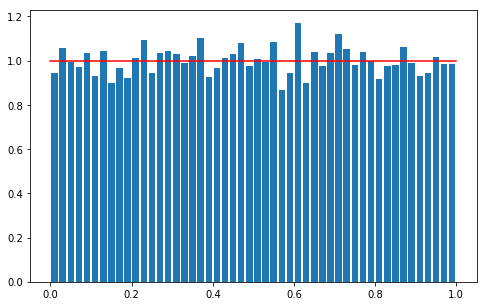

In [45]:
from scipy.stats import expon
from functools import partial
hist = partial(plt.hist, density=True, rwidth=0.8, bins=50)
fig = plt.gcf()
fig.set_size_inches(8, 5)

def task1_1(n):
    ksi_1 = expon(0, 1)
    ksi_2 = expon(0, 1)
    rvs_1 = ksi_1.rvs(size=n)
    rvs_2 = ksi_2.rvs(size=n)
    tmp = rvs_1 / (rvs_1 + rvs_2) 
    hist(tmp)
    plt.plot((0, 1), (1, 1), 'r')
    plt.show()
    
task1_1(10000)

### 1.2 Завдання 1.2

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного експоненційного розподілу.
Тобто $\xi_1, \xi_2 \sim Exp(1)$.

Який розподіл має випадкова величина $\eta = \xi_1 + \xi_2$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження.** Передбачається використання теореми про обрахунок щільності суми двох незалежних випадкових величин (через згортку щільностей).

$$
\begin{aligned}
f_{\xi_1 + \xi_2}(x) &= \int_{-\infty}^{\infty}{f_{\xi_1}(x - y)f_{\xi_2}(y)dy} \\
f_{\xi_1 + \xi_2}(x) &= \int_{-\infty}^{\infty}{\mathbb{1}_{[0; +\infty}(x-y)\mathbb{1}_{[0; +\infty}(y)e^{-x + y}e^{-y}dy} \\
&= e^{x} \int_{0}^{\infty}{\mathbb{1}_{[0; +\infty}(x-y)dy}\\
&= e^{x} \int_{0}^{x}{1dy} \\
&= x e^x \sim Г(2)
\end{aligned}
$$

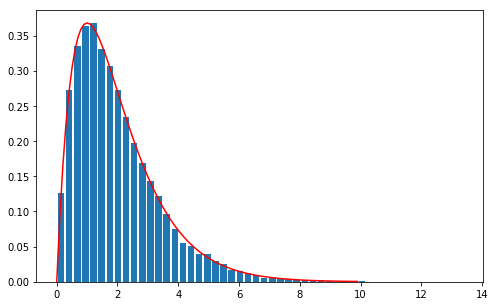

In [46]:
from scipy.stats import gamma
fig = plt.gcf()
fig.set_size_inches(8, 5)

def task1_2(n):
    ksi_1 = expon(0, 1)
    ksi_2 = expon(0, 1)
    rvs_1 = ksi_1.rvs(size=n)
    rvs_2 = ksi_2.rvs(size=n)
    tmp = rvs_1 + rvs_2

    t = np.arange(0, 10, 0.1)
    hist(tmp)
    plt.plot(t, gamma.pdf(t, a=2, loc=0), 'r')
    plt.show()

task1_2(10000)

## 2 Нормальний розподіл

### 2.1 Завдання 2.1

Розглянемо три незалежні випадкові величини $\xi_1, \xi_2, \theta$ такі,
що $\xi_1, \xi_2 \sim N(0, 1), \theta \sim Uniform(0, 2 \pi)$.

Який розподіл має випадкова величина $\displaystyle \zeta = \xi_1 \cos \theta + \xi_2 \sin \theta$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2, \theta$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$.

**Зауваження.** Передбачається використання теореми про лінійне перетворення нормальних величин.

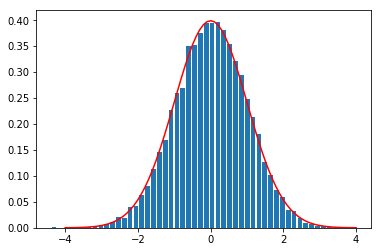

In [47]:
from scipy.stats import norm, uniform

def task2_1(n):
    ksi_1 = norm(0, 1)
    ksi_2 = norm(0, 1)
    ksi_3 = uniform(0, 2*np.pi)

    rvs_1 = ksi_1.rvs(size=n)
    rvs_2 = ksi_2.rvs(size=n)
    rvs_3 = ksi_3.rvs(size=n)

    tmp = rvs_1*np.cos(rvs_3) + rvs_2*np.sin(rvs_3)
    hist(tmp)
    plt.plot(np.arange(-4, 4.1, 0.1), norm(0, 1).pdf(np.arange(-4, 4.1, 0.1)), 'r')
    plt.show()
    
task2_1(10000)

### 2.2 Завдання 2.2

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Які розподіли (щільності) мають випадкові величини $\displaystyle \zeta = \sqrt{\xi_1^2 + \xi_2^2}, \eta = \arccos \frac{\xi_1}{\zeta}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Отримайте $n = 10000$ значень випадкової величини $\eta$;
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження 1.** Передбачається використання теореми про обрахунок щільності функції від випадкової величини (через якобіан оберненого відображення).

**Зауваження 2.** Насправді, розподіл отриманих значень випадкової величини $\eta$ буде трохи відрізнятися від порахованого теоретично (будуть інші параметри).
Так виходить за рахунок реалізації функції $\arccos$ (її області значень).

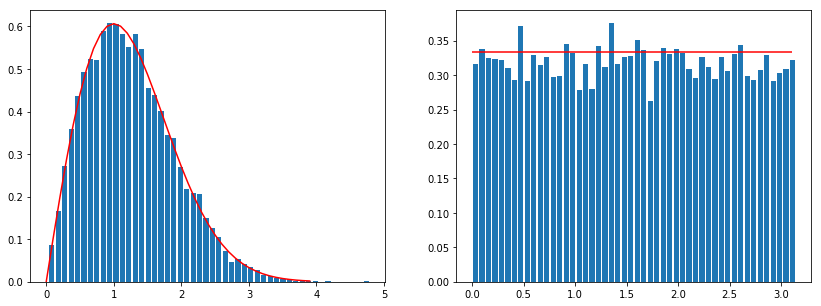

In [54]:
fig = plt.gcf()
fig.set_size_inches(14, 5)

def task2_2(n):
    ksi_1 = norm(0, 1)
    ksi_2 = norm(0, 1)

    rvs_1 = ksi_1.rvs(size=n)
    rvs_2 = ksi_2.rvs(size=n)
    rvs_z = (rvs_1**2 + rvs_2**2)**0.5
    rvs_e = np.arccos(rvs_1/rvs_z)

    plt.subplot(121)
    hist(rvs_z)
    x = np.arange(0, 4, 0.1)
    y = x*np.exp((-x**2)/2)
    plt.plot(x, y, 'r')

    plt.subplot(122)
    hist(rvs_e)
    plt.hlines(1/3, 0, 3.1, 'r')
    plt.show()
    
task2_2(10000)

## 3 Рівномірний розподіл

### 3.1 Завдання 3.1

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ з рівномірного розподілу на $[-1, 1]$.
Тобто $\xi_1, \xi_2 \sim Uniform(-1, 1)$.

Який розподіл має випадкова величина $\eta = \xi_1 + \xi_2$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\eta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження.** Передбачається використання теореми про обрахунок щільності суми двох незалежних випадкових величин (через згортку щільностей).

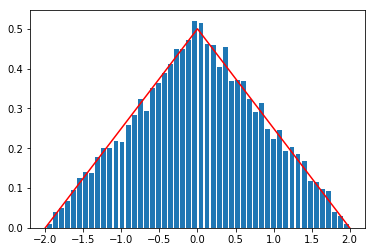

In [63]:
def task3_1(n):
    ksi = uniform(loc=-1, scale=2)

    rvs_1 = ksi.rvs(size=n)
    rvs_2 = ksi.rvs(size=n)
    hist(rvs_1 + rvs_2)
    plt.plot((-2, 0, 2), (0, 0.5, 0), 'r')
    plt.show()
    
task3_1(10000)